In [1]:
import glob
import pandas as pd

In [2]:
user_groups = "2"
results_path = "results/" + user_groups + "/"
datasets = ['Epinion', 'Gowalla', 'LastFM', 'MovieLens', 'AmazonOffice', 'AmazonToy', 'BookCrossing', 'Foursquare']

In [3]:
results_files = []

for dataset in datasets:
    for file in glob.glob(results_path + dataset + "/*.csv"):
        results_files.append(file)
print(f"No. of files: {len(results_files)}")

No. of files: 48


In [4]:
all_dfs = []

for result_file in results_files:
    result_df = pd.read_csv(result_file, sep=",")
    all_dfs.append(result_df)

# concat all of the dataframes
results_df = pd.concat(all_dfs)

In [5]:
# sort results dataframe
results_df = results_df.sort_values(["Dataset", "Model", 'Type'], ascending = (False, True, False))

In [6]:
results_df.head()

,Dataset,Model,GUser,GItem,Type,User_EPS,Item_EPS,ndcg_ALL,ndcg_ACT,ndcg_INACT,...,Nov_ACT,Nov_INACT,Cov_ALL,Cov_ACT,Cov_INACT,Active_GAP,Inactive_Gap,Short_Items,Long_Items,All_Items
0,MovieLens100K,BPR,2%,020%,N,-,-,0.08924,0.13814,0.07701,...,1.86953,1.86957,0.89,0.74,0.89,135.568,88.820,9430.0,0.0,9430==9430.0
1,MovieLens100K,BPR,2%,020%,C,0.0000000,-,0.09019,0.11539,0.08389,...,1.87997,1.89280,1.33,1.26,1.33,133.924,85.854,9430.0,0.0,9430==9430.0
2,MovieLens100K,BPR,2%,020%,C,60.5833333,-,0.08968,0.11779,0.08265,...,1.88079,1.88766,1.26,1.19,1.26,133.799,86.525,9430.0,0.0,9430==9430.0
3,MovieLens100K,BPR,2%,020%,C,121.1666667,-,0.09022,0.12198,0.08228,...,1.88248,1.88744,1.11,1.04,1.11,133.512,86.547,9430.0,0.0,9430==9430.0
4,MovieLens100K,BPR,2%,020%,C,181.7500000,-,0.08977,0.12237,0.08162,...,1.88052,1.88533,1.19,1.04,1.11,133.836,86.825,9430.0,0.0,9430==9430.0


In [7]:
def UGF(row):
    return round(row['ndcg_ACT'] - row['ndcg_INACT'], 4)

In [8]:
results_df['UGF'] = results_df.apply(lambda row: UGF(row), axis=1)

In [9]:
results_df.head()

,Dataset,Model,GUser,GItem,Type,User_EPS,Item_EPS,ndcg_ALL,ndcg_ACT,ndcg_INACT,...,Nov_INACT,Cov_ALL,Cov_ACT,Cov_INACT,Active_GAP,Inactive_Gap,Short_Items,Long_Items,All_Items,UGF
0,MovieLens100K,BPR,2%,020%,N,-,-,0.08924,0.13814,0.07701,...,1.86957,0.89,0.74,0.89,135.568,88.820,9430.0,0.0,9430==9430.0,0.0611
1,MovieLens100K,BPR,2%,020%,C,0.0000000,-,0.09019,0.11539,0.08389,...,1.89280,1.33,1.26,1.33,133.924,85.854,9430.0,0.0,9430==9430.0,0.0315
2,MovieLens100K,BPR,2%,020%,C,60.5833333,-,0.08968,0.11779,0.08265,...,1.88766,1.26,1.19,1.26,133.799,86.525,9430.0,0.0,9430==9430.0,0.0351
3,MovieLens100K,BPR,2%,020%,C,121.1666667,-,0.09022,0.12198,0.08228,...,1.88744,1.11,1.04,1.11,133.512,86.547,9430.0,0.0,9430==9430.0,0.0397
4,MovieLens100K,BPR,2%,020%,C,181.7500000,-,0.08977,0.12237,0.08162,...,1.88533,1.19,1.04,1.11,133.836,86.825,9430.0,0.0,9430==9430.0,0.0408


In [10]:
ds_group_results_df = results_df.groupby('Dataset')

def main_results_extraction(dataset='Epinion', model='NeuMF'):
    global heatmap_df
    global boxplot_df
    ml_group_results_df = ds_group_results_df.get_group(dataset).groupby('Model')
    model_df = ml_group_results_df.get_group(model)
    N_df = model_df[(model_df.Type == 'N')]
    # print(model)
    C_df = model_df[(model_df.Type == 'C') & (model_df.UGF > 0)]
    # print(C_df)
    if C_df.empty == True:
        # all UGfs are negative
        C_df = model_df[(model_df.Type == 'C') & (model_df.UGF == model_df.UGF.max())]
    else:
        # print(C_df)
        C_df = C_df[C_df.UGF == C_df.UGF.min()]
        # print(C_df)
    _UGF_N = round(N_df.UGF.values[0], 4)
    _UGF_C = round(C_df.UGF.values[0], 4)
    print(f"\multirow{{2}}{{*}}{{{N_df.Model.values[0]}}} & Org. & {round(N_df.ndcg_ALL.values[0], 4)} & {round(N_df.ndcg_ACT.values[0], 4)} & {round(N_df.ndcg_INACT.values[0], 4)} & {round(N_df.UGF.values[0], 4)} & {round(abs((_UGF_N - _UGF_N) / _UGF_N) * 100, 2)} && {round(N_df.Nov_ALL.values[0], 4)} & {N_df.Cov_ALL.values[0]} & {round(N_df.Short_Items.values[0], 4)} & {round(N_df.Long_Items.values[0], 4)} & {round(N_df.Active_GAP.values[0], 4)} & {round(N_df.Inactive_Gap.values[0], 4)} \\\\")
    print(f"                       & Fair & {round(C_df.ndcg_ALL.values[0], 4)} & {round(C_df.ndcg_ACT.values[0], 4)} & {round(C_df.ndcg_INACT.values[0], 4)} & {round(C_df.UGF.values[0], 4)} & {round(abs((_UGF_C - _UGF_N) / _UGF_N) * 100, 2)} && {round(C_df.Nov_ALL.values[0], 4)} & {C_df.Cov_ALL.values[0]} & {round(C_df.Short_Items.values[0], 4)} & {round(C_df.Long_Items.values[0], 4)} & {round(C_df.Active_GAP.values[0], 4)} & {round(C_df.Inactive_Gap.values[0], 4)} \\\ \hline")
    # heatmap_df = heatmap_df.append({'Dataset': model_df.Dataset.values[0], 'Group': 'All', 'Model': model_df.Model.values[0], 'Precision': model_df.Pre_ALL.values[0]}, ignore_index=True)
    # N
    heatmap_df = heatmap_df.append({'Dataset': model_df.Dataset.values[0],'Group': 'Org.', 'Model': model_df.Model.values[0], 'UGF': (N_df.Pre_ACT.values[0] - N_df.Pre_INACT.values[0])}, ignore_index=True)
    heatmap_df = heatmap_df.append({'Dataset': model_df.Dataset.values[0],'Group': 'Fair', 'Model': model_df.Model.values[0], 'UGF': (C_df.Pre_ACT.values[0] - C_df.Pre_INACT.values[0])}, ignore_index=True)
    # heatmap_df = heatmap_df.append({'Dataset': model_df.Dataset.values[0],'Group': 'Fair (Act.)', 'Model': model_df.Model.values[0], 'Precision': C_df.Pre_ACT.values[0]}, ignore_index=True)
    # heatmap_df = heatmap_df.append({'Dataset': model_df.Dataset.values[0],'Group': 'Fair (Inact.)', 'Model': model_df.Model.values[0], 'Precision': C_df.Pre_INACT.values[0]}, ignore_index=True)

    boxplot_df = boxplot_df.append({'Dataset': model_df.Dataset.values[0], 'Model': model_df.Model.values[0], 'Type': 'Orginal', 'UGF': N_df.UGF.values[0], 'NDCG': N_df.ndcg_ALL.values[0], 'Nov': N_df.Nov_ALL.values[0], 'Cov': N_df.Cov_ALL.values[0]}, ignore_index=True)
    boxplot_df = boxplot_df.append({'Dataset': model_df.Dataset.values[0], 'Model': model_df.Model.values[0], 'Type': 'Fair', 'UGF': C_df.UGF.values[0], 'NDCG': N_df.ndcg_ALL.values[0], 'Nov': N_df.Nov_ALL.values[0], 'Cov': N_df.Cov_ALL.values[0]}, ignore_index=True)

In [11]:
heatmap_df = pd.DataFrame(columns=['Dataset', 'Group', 'Model', 'UGF'])
boxplot_df = pd.DataFrame(columns=['Dataset', 'Model','Type', 'UGF', 'NDCG', 'Nov', 'Cov'])

Models = ['MostPop', 'BPR', 'PF', 'WMF', 'NeuMF', 'VAECF']
for dataset in datasets:
    print(f"> Dataset: {dataset}")
    for model in Models:
        main_results_extraction(dataset=dataset, model=model)

> Dataset: Epinion
\multirow{2}{*}{MostPop} & Org. & 0.0302 & 0.0465 & 0.0261 & 0.0204 & 0.0 && 3.7133 & 0.49 & 26770.0 & 0.0 & 202.723 & 207.972 \\
                       & Fair & 0.0299 & 0.0445 & 0.0262 & 0.0182 & 10.78 && 3.7 & 0.83 & 26770.0 & 0.0 & 217.749 & 208.241 \\ \hline
\multirow{2}{*}{BPR} & Org. & 0.0304 & 0.0446 & 0.0268 & 0.0178 & 0.0 && 3.708 & 0.68 & 26770.0 & 0.0 & 203.427 & 208.685 \\
                       & Fair & 0.0302 & 0.0414 & 0.0274 & 0.014 & 21.35 && 3.6818 & 0.87 & 26770.0 & 0.0 & 219.547 & 213.101 \\ \hline
\multirow{2}{*}{PF} & Org. & 0.0321 & 0.0516 & 0.0272 & 0.0244 & 0.0 && 4.9602 & 50.73 & 22169.0 & 4601.0 & 70.422 & 60.071 \\
                       & Fair & 0.0332 & 0.0469 & 0.0298 & 0.0171 & 29.92 && 4.9727 & 50.92 & 22067.0 & 4703.0 & 73.278 & 57.827 \\ \hline
\multirow{2}{*}{WMF} & Org. & 0.0235 & 0.0392 & 0.0196 & 0.0196 & 0.0 && 4.9483 & 29.13 & 25225.0 & 1545.0 & 45.145 & 42.495 \\
                       & Fair & 0.024 & 0.0369 & 0.0207 & 0.01

In [12]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [13]:
# sort results dataframe
heatmap_df = heatmap_df.sort_values(["Dataset", "Model", 'Group'], ascending = (False, True, True))
group_heatmap_df = heatmap_df.groupby('Model')

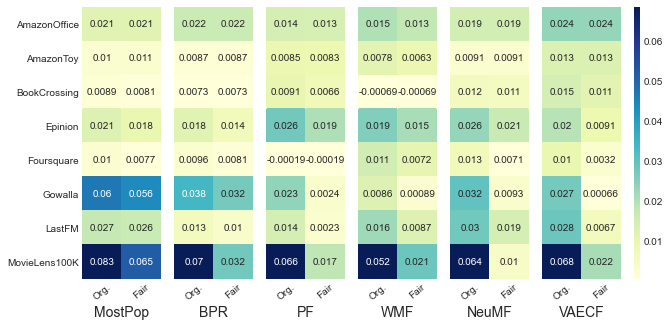

In [16]:
df_Pop = group_heatmap_df.get_group('MostPop').pivot("Dataset", "Group", "UGF")
df_BPR = group_heatmap_df.get_group('BPR').pivot("Dataset", "Group", "UGF")
df_PF = group_heatmap_df.get_group('PF').pivot("Dataset", "Group", "UGF")
df_WMF = group_heatmap_df.get_group('WMF').pivot("Dataset", "Group", "UGF")
df_NeuMF = group_heatmap_df.get_group('NeuMF').pivot("Dataset", "Group", "UGF")
df_VAECF = group_heatmap_df.get_group('VAECF').pivot("Dataset", "Group", "UGF")

f,(ax0,ax1,ax2,ax3,ax4,ax5,axcb) = plt.subplots(1,7, gridspec_kw={'width_ratios':[1,1,1,1,1,1,0.08]}, figsize=(10, 5))
# ax1.get_shared_y_axes().join(ax2,ax3)

g0 = sns.heatmap(data=df_Pop.reindex(['Org.', 'Fair'], axis=1), annot=True, cmap="YlGnBu", cbar=False, ax=ax0)
g0.set_ylabel('')
g0.set_xlabel('MostPop', fontsize=14)

g1 = sns.heatmap(data=df_BPR.reindex(['Org.', 'Fair'], axis=1),annot=True, cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('BPR', fontsize=14)
g1.set_yticks([])

g2 = sns.heatmap(data=df_PF.reindex(['Org.', 'Fair'], axis=1),annot=True, cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('PF', fontsize=14)
g2.set_yticks([])

g3 = sns.heatmap(data=df_WMF.reindex(['Org.', 'Fair'], axis=1),annot=True, cmap="YlGnBu",cbar=False,ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('WMF', fontsize=14)
g3.set_yticks([])

g4 = sns.heatmap(data=df_NeuMF.reindex(['Org.', 'Fair'], axis=1),annot=True, cmap="YlGnBu",cbar=False,ax=ax4)
g4.set_ylabel('')
g4.set_xlabel('NeuMF', fontsize=14)
g4.set_yticks([])

g5 = sns.heatmap(data=df_VAECF.reindex(['Org.', 'Fair'], axis=1),annot=True, cmap="YlGnBu",ax=ax5, cbar_ax=axcb)
g5.set_ylabel('')
g5.set_xlabel('VAECF', fontsize=14)
g5.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g0,g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=40)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.savefig(f'plots/{user_groups}/heatmap_{user_groups}.pdf', bbox_inches='tight')

In [ ]:
group_boxplot_df = boxplot_df.groupby('Dataset')

In [ ]:
# for dataset in datasets:
#     print(f"Dataset: {dataset}")
#     box_plt = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group(dataset))
#     plt.show()

In [ ]:
import seaborn  as sns
import matplotlib.pyplot as plt

# plt.xticks(fontsize=14, rotation=90)

f,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8, gridspec_kw={'width_ratios':[1,1,1,1,1,1,1,1]}, figsize=(35, 6))
# ax1.get_shared_y_axes().join(ax2,ax3)

g1 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('MovieLens100K'), ax=ax1)
g1.set_ylabel('UGF', fontsize=16)
g1.set_xlabel('MovieLens100K', fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(), fontsize=14)
g1.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
g1.set_yticklabels(np.round(g1.get_yticks(), 2), fontsize=16)

g2 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('Epinion'), ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Epinion', fontsize=16)
g2.set_xticklabels(g2.get_xticklabels(), fontsize=14)
g2.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
g2.set_yticklabels(np.round(g2.get_yticks(), 2), fontsize=2, color='w')
# g2.set_yticks([])

g3 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('BookCrossing'), ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('BookCrossing', fontsize=16)
g3.set_xticklabels(g3.get_xticklabels(), fontsize=14)
g3.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
# g3.set_yticks([])
g3.set_yticklabels(np.round(g3.get_yticks(), 2), fontsize=2, color='w')

g4 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('AmazonOffice'), ax=ax4)
g4.set_ylabel('')
g4.set_xlabel('AmazonOffice', fontsize=16)
g4.set_xticklabels(g4.get_xticklabels(), fontsize=14)
g4.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
# g4.set_yticks([])
g4.set_yticklabels(np.round(g4.get_yticks(), 2), fontsize=2, color='w')

g5 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('AmazonToy'), ax=ax5)
g5.set_ylabel('')
g5.set_xlabel('AmazonToy', fontsize=16)
g5.set_xticklabels(g5.get_xticklabels(), fontsize=14)
g5.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
# g5.set_yticks([])
g5.set_yticklabels(np.round(g5.get_yticks(), 2), fontsize=2, color='w')

g6 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('LastFM'), ax=ax6)
g6.set_ylabel('')
g6.set_xlabel('LastFM', fontsize=16)
g6.set_xticklabels(g6.get_xticklabels(), fontsize=14)
g6.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
# g6.set_yticks([])
g6.set_yticklabels(np.round(g6.get_yticks(), 2), fontsize=2, color='w')

g7 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('Gowalla'), ax=ax7)
g7.set_ylabel('')
g7.set_xlabel('Gowalla', fontsize=16)
g7.set_xticklabels(g7.get_xticklabels(), fontsize=14)
g7.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
# g7.set_yticks([])
g7.set_yticklabels(np.round(g7.get_yticks(), 2), fontsize=2, color='w')

g8 = sns.boxplot(x="Type", y="UGF", data=group_boxplot_df.get_group('Foursquare'), ax=ax8)
g8.set_ylabel('')
g8.set_xlabel('Foursquare', fontsize=16)
g8.set_xticklabels(g8.get_xticklabels(), fontsize=14)
g8.set_ylim(min(boxplot_df.UGF), round(max(boxplot_df.UGF), 2))
# g8.set_yticks([])
g8.set_yticklabels(np.round(g8.get_yticks(), 2), fontsize=2, color='w')

plt.savefig(f'plots/{user_groups}/boxplot_{user_groups}.pdf', bbox_inches='tight')

In [ ]:
p = sns.boxplot(x="Model", y="UGF", data=boxplot_df[boxplot_df.Type == 'Fair'])
p.set_yticklabels(np.round(p.get_yticks(), 4), fontsize=14)
p.set_xticklabels(p.get_xticklabels(), fontsize=14)
p.set_ylabel('UGF', fontsize=16)
p.set_xlabel('Model', fontsize=16)
plt.savefig(f'plots/{user_groups}/boxplot_models_{user_groups}.pdf', bbox_inches='tight')

In [ ]:
for metric in ['NDCG', 'Nov', 'Cov']:
    fig = plt.figure()
    r = sns.regplot(x="UGF", y=metric, data=boxplot_df[boxplot_df.Type == 'Fair'])
    r.set_yticklabels(np.round(r.get_yticks(), 4), fontsize=14)
    r.set_xticklabels(np.round(r.get_xticks(), 4), fontsize=14)
    r.set_ylabel(f"{metric}", fontsize=16)
    r.set_xlabel('UGF', fontsize=16)
    fig.savefig(f'plots/{user_groups}/boxplot_corr_{metric}_{user_groups}.pdf', bbox_inches='tight')